In [1]:
import csv
import os
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ntpath

In [2]:
def getlistofFiles(dirName):
    import os
    listofFiles = os.listdir(dirName)
    allfiles = list()
    for entry in listofFiles:
        fullpath = os.path.join(dirName, entry)
        if os.path.isdir(fullpath):
            allfiles = allfiles + getlistofFiles(fullpath)
        else:
            allfiles.append(fullpath)
    return allfiles    

In [3]:
def neutralData(data):
    df = pd.read_csv(data, delimiter=",")
    positive_analysis = df['Positve']
    negative_analysis = df['Negative']
    neutral_analysis = df['Neutral']
    l = np.array(df['Neutral'])
    maxVal = l.max()
    minVal = l.min()
    avgVal = (maxVal+minVal)/2.0
    print("Stock Name : "+df['Name'].iloc[0])
    print("===========================")
    print ("min: %f , max: %f" % (minVal,maxVal))
    neutral_pos = []
    neutral_neg = []

    for i in range(len(neutral_analysis)):
        if( neutral_analysis[i]> avgVal):
            neutral_pos.append(positive_analysis[i] + (neutral_analysis[i]-avgVal))
            neutral_neg.append(negative_analysis[i])
        else:
            neutral_pos.append(positive_analysis[i])
            neutral_neg.append(negative_analysis[i]+ (-neutral_analysis[i]+avgVal))
    print(len(neutral_pos))
    print(len(neutral_neg))
    plt.figure(figsize=(15,10))
    plt.title(df['Name'].iloc[0])
    plt.plot(df['Date'], negative_analysis, color='r',label = 'Negative Tweets')
    plt.plot(df['Date'], positive_analysis, color='g',label = 'Positve Tweets')
    plt.plot(df['Date'],  df['Neutral'], color='b',label = 'Neutral Tweets')
    plt.plot(df['Date'], neutral_pos, color='c',label = 'neutral Positive')
    plt.plot(df['Date'], neutral_neg, color='m',label = 'neutral Negative')
    plt.legend()
    plt.show()
    return neutral_pos, neutral_neg

In [4]:
filepath = os.getcwd()
dirName = filepath + "\MyDrive"
dataFiles = getlistofFiles(dirName)
dataDict = {}

#### Identifies the variation in Neutral tweets

AAPL_NeutralPos AAPL_NeutralNeg
Stock Name : AAPL
min: 32.961783 , max: 68.714556
109
109


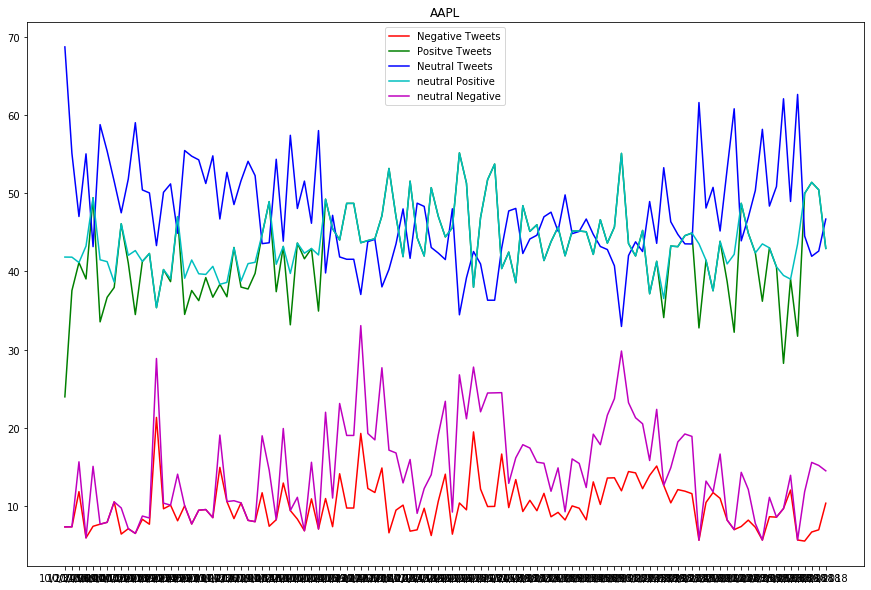

Amazon_NeutralPos Amazon_NeutralNeg
Stock Name : AMZN
min: 37.506089 , max: 86.527809
109
109


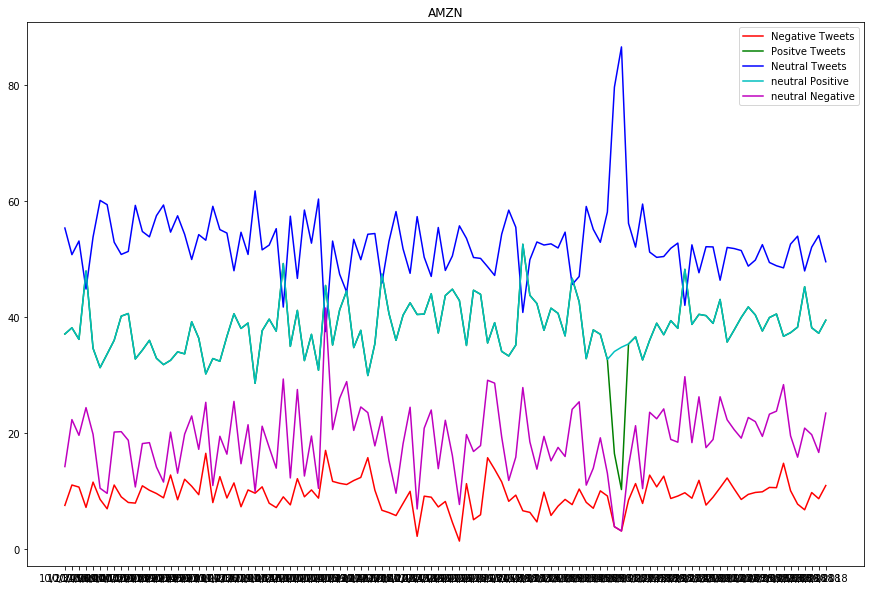

CSCO_NeutralPos CSCO_NeutralNeg
Stock Name : CSCO
min: 29.166667 , max: 84.000000
109
109


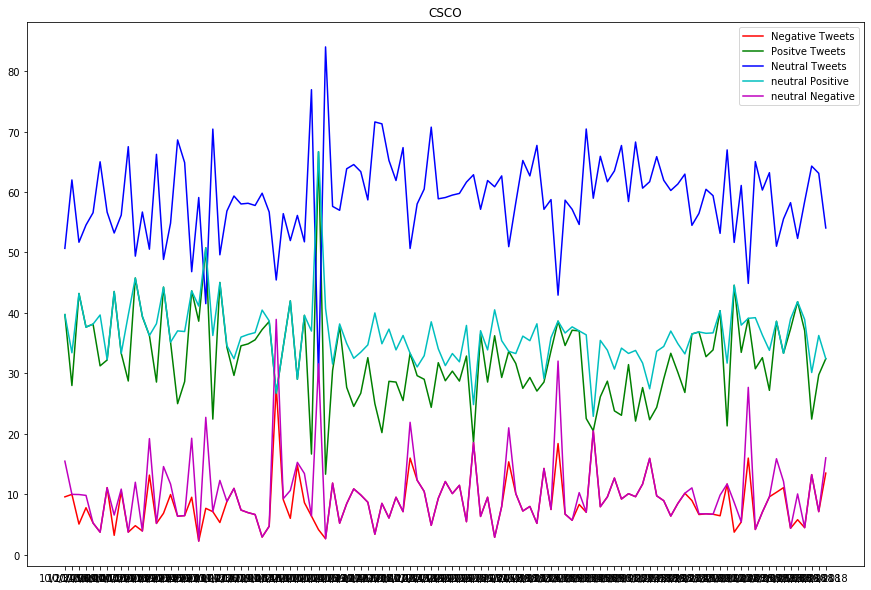

IBM_NeutralPos IBM_NeutralNeg
Stock Name : IBM
min: 50.788714 , max: 75.092502
109
109


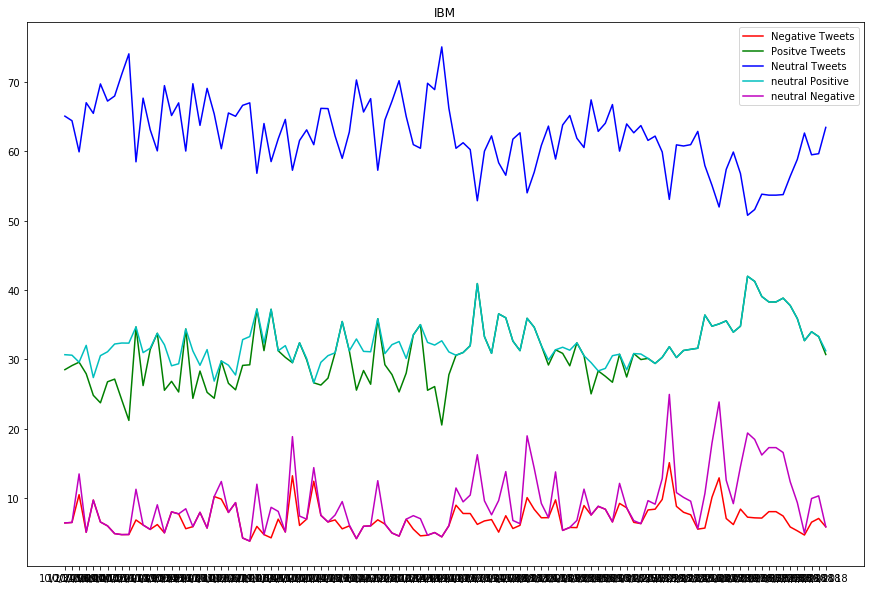

JNJ_NeutralPos JNJ_NeutralNeg
Stock Name : JNJ
min: 53.627181 , max: 81.174439
109
109


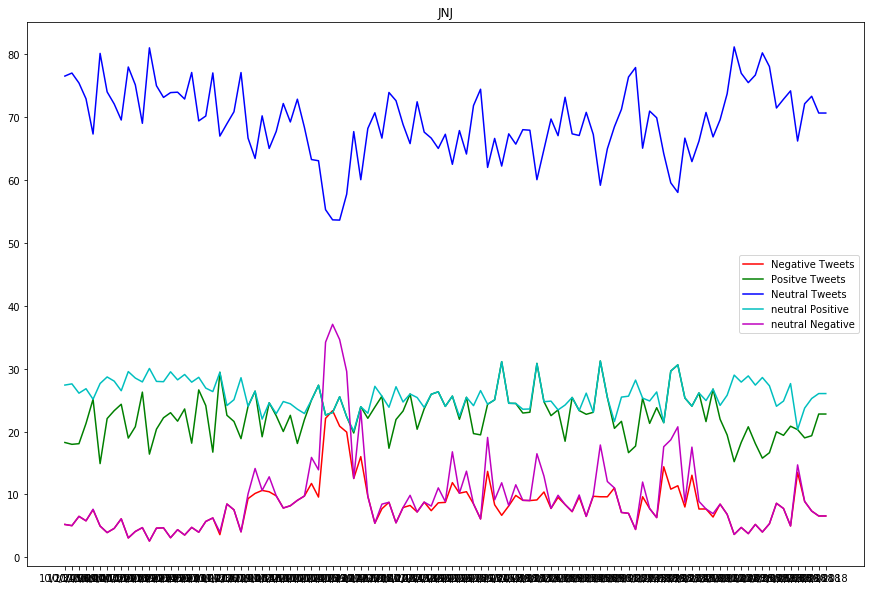

JNPR_NeutralPos JNPR_NeutralNeg
Stock Name : JNPR
min: 38.095238 , max: 87.500000
109
109


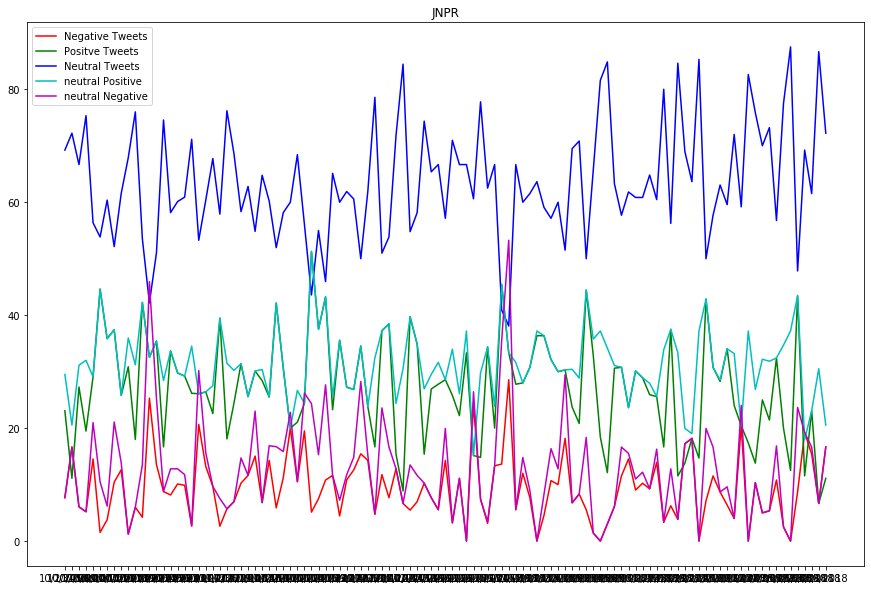

MSFT_NeutralPos MSFT_NeutralNeg
Stock Name : MSFT
min: 37.189189 , max: 57.235984
109
109


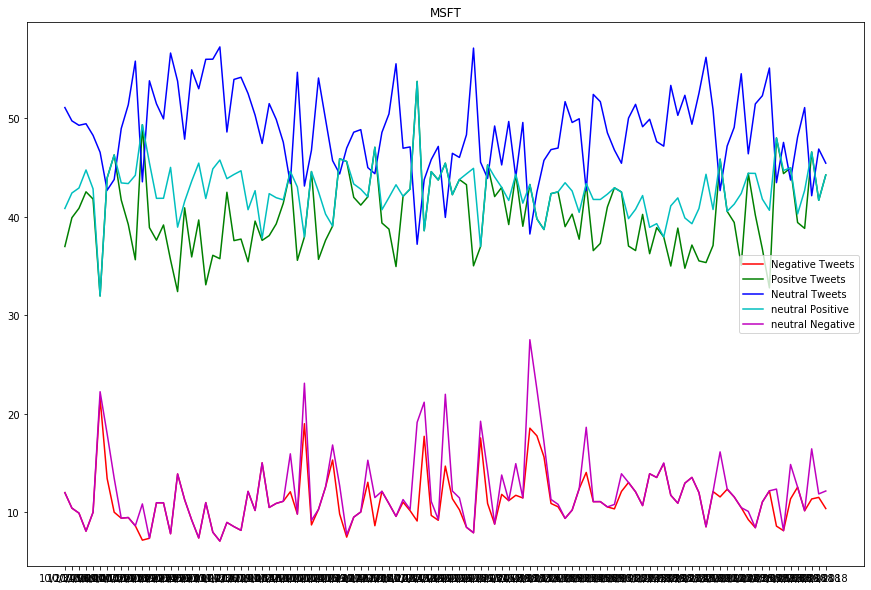

ORCL_NeutralPos ORCL_NeutralNeg
Stock Name : ORCL
min: 38.211382 , max: 80.701754
109
109


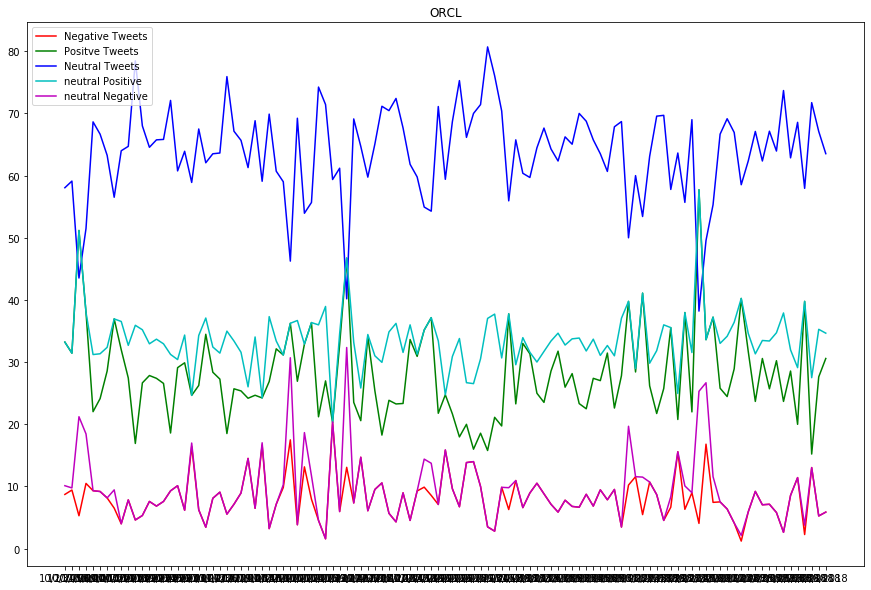

Pfizer_NeutralPos Pfizer_NeutralNeg
Stock Name : PFE
min: 51.162791 , max: 78.761062
109
109


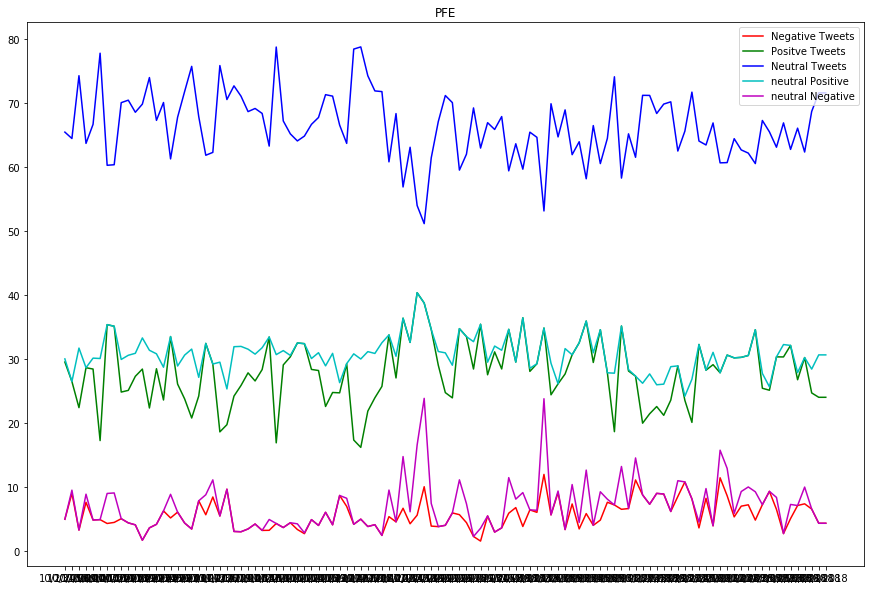

TGT_NeutralPos TGT_NeutralNeg
Stock Name : TGT
min: 47.145380 , max: 66.068053
109
109


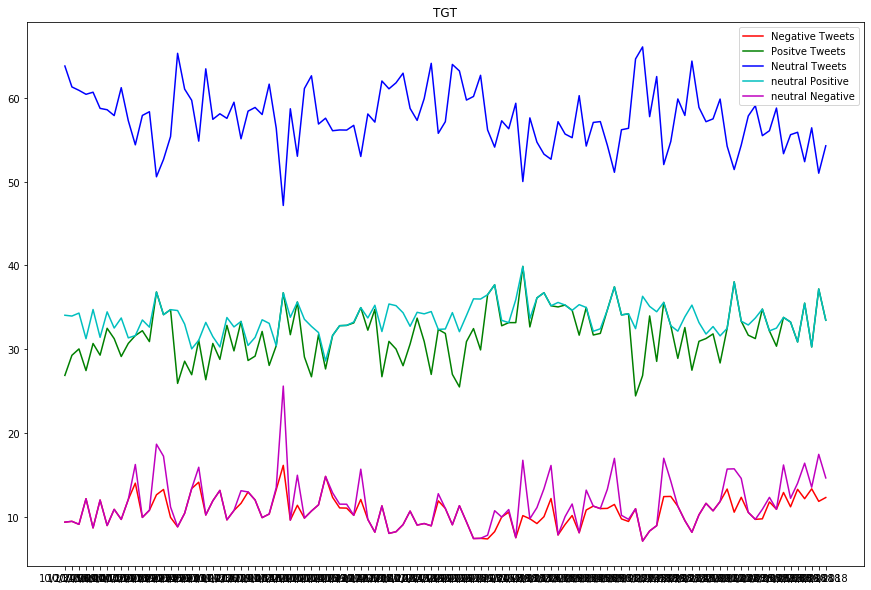

In [5]:
for fileName in dataFiles:
    head, tail = ntpath.split(fileName)
    key1 = tail.split("Stock")[0] + "_NeutralPos"
    key2 = tail.split("Stock")[0] + "_NeutralNeg"
    print(key1, key2)
    dataDict[key1], dataDict[key2] = neutralData(fileName)

In [6]:
#dataDict[key1], dataDict[key2] = neutralData(dataFiles[8])

In [6]:
for key, value in dataDict.items():
    print(key, len(dataDict[key]))

AAPL_NeutralPos 109
AAPL_NeutralNeg 109
Amazon_NeutralPos 109
Amazon_NeutralNeg 109
CSCO_NeutralPos 109
CSCO_NeutralNeg 109
IBM_NeutralPos 109
IBM_NeutralNeg 109
JNJ_NeutralPos 109
JNJ_NeutralNeg 109
JNPR_NeutralPos 109
JNPR_NeutralNeg 109
MSFT_NeutralPos 109
MSFT_NeutralNeg 109
ORCL_NeutralPos 109
ORCL_NeutralNeg 109
Pfizer_NeutralPos 109
Pfizer_NeutralNeg 109
TGT_NeutralPos 109
TGT_NeutralNeg 109


In [7]:
dataF = pd.DataFrame(dataDict)


In [8]:
dataF.to_csv('NeutralData_New.csv')